## Regression - Bike Sharing Demand
### 데이터  가공

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
bike_df = pd.read_csv('../data/bike_train.csv')
bike_test_df = pd.read_csv('../data/bike_test.csv')
print(bike_df.shape)
print(bike_test_df.shape)
bike_df.head()
bike_df.tail()
#https://bkshin.tistory.com/entry/%EC%BA%90%EA%B8%80-1-Bike-Sharing-Demand

(10886, 12)
(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [231]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_test_df['datetime'] = bike_test_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21772 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    21772 non-null  datetime64[ns]
 1   season      21772 non-null  int64         
 2   holiday     21772 non-null  int64         
 3   workingday  21772 non-null  int64         
 4   weather     21772 non-null  int64         
 5   temp        21772 non-null  float64       
 6   atemp       21772 non-null  float64       
 7   humidity    21772 non-null  int64         
 8   windspeed   21772 non-null  float64       
 9   casual      21772 non-null  int64         
 10  registered  21772 non-null  int64         
 11  count       21772 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 2.2 MB


In [232]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df['dayofweek'] = bike_df.datetime.apply(lambda x: x.dayofweek)


bike_test_df['year'] = bike_test_df.datetime.apply(lambda x : x.year)
bike_test_df['month'] = bike_test_df.datetime.apply(lambda x : x.month)
bike_test_df['day'] = bike_test_df.datetime.apply(lambda x : x.day)
bike_test_df['hour'] = bike_test_df.datetime.apply(lambda x: x.hour)
bike_test_df['dayofweek'] = bike_test_df.datetime.apply(lambda x: x.dayofweek)

figure, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 10)

sns.barplot(data=bike_df, x="year", y="count", ax=ax1)
sns.barplot(data=bike_df, x="month", y="count", ax=ax2)
sns.barplot(data=bike_df, x="day", y="count", ax=ax3)
sns.barplot(data=bike_df, x="hour", y="count", ax=ax4)
#sns.barplot(data=bike_df, x="dayofweek", y="count", ax=ax5)

ax1.set(title="Rental amounts by year")
ax2.set(title="Rental amounts by month")
ax3.set(title="Rental amounts by day")
ax4.set(title="Rental amounts by hour")
#ax5.set(title="Rental amounts by dayofweek")

figure, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 10)

sns.barplot(data=bike_df, x="atemp", y="count", ax=ax1)
sns.barplot(data=bike_df, x="humidity", y="count", ax=ax2)
sns.barplot(data=bike_df, x="windspeed", y="count", ax=ax3)
sns.barplot(data=bike_df, x="dayofweek", y="count", ax=ax4)

ax1.set(title="atemp")
ax2.set(title="humidity")
ax3.set(title="windspeed")
ax4.set(title="dayofweek")

drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)
drop_col = ['datetime']
bike_test_df.drop(drop_col, axis=1,inplace=True)

In [233]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)
drop_col = ['datetime']
bike_test_df.drop(drop_col, axis=1,inplace=True)

In [234]:
bike_test_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3


In [235]:
bike_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5


In [236]:
X_train=bike_df.drop(["count"],axis=1)

In [237]:
y_train=bike_df["count"]

In [238]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_train_log = np.log1p(y_train)

In [239]:
# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_train_exp = np.expm1(y_train_log)

In [240]:
X_train_ohe = pd.get_dummies(X_train, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])

In [241]:
X_test_ohe = pd.get_dummies(bike_test_df, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])

from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=400)
lgbm_reg.fit(X_train_ohe,y_train_log)
pred_y = lgbm_reg.predict(X_test_ohe)
a=[max(0,a) for a in np.expm1(pred_y)]

In [242]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=310)
lgbm_reg.fit(X_train_ohe,y_train_log)
pred_y = lgbm_reg.predict(X_test_ohe)
a=[max(0,a) for a in np.expm1(pred_y)]
#0.39286
#200 0.39531
#250 0.39442
#350 0.39433
#330 0.39389
#310 0.39281

In [243]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=200)
lgbm_reg.fit(X_train_ohe,y_train_log)
pred_y = lgbm_reg.predict(X_test_ohe)
a=[max(0,a) for a in np.expm1(pred_y)]

In [244]:
bike_test=pd.read_csv("../data/bike_test.csv")

In [245]:
b=pd.DataFrame({"datetime":bike_test['datetime'],"count":a})

In [246]:
b.to_csv("../data/bike_19.csv",index=None)

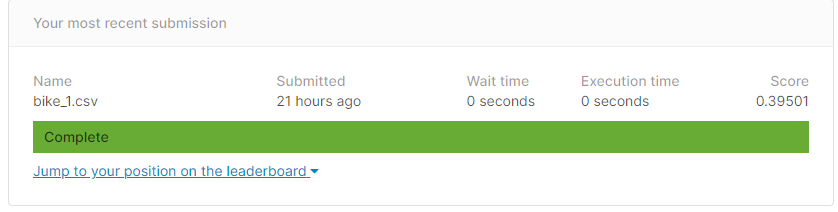